## todo


- add cm
- add xgboost to custom.json
- add cleaning
- add t-SNE
- add other datasets
- - iris, moon, blobs


In [1]:
%matplotlib inline

import matplotlib

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons





In [2]:
%load_ext autoreload
%autoreload 2
packages = !conda list
packages

['# packages in environment at /opt/conda:',
 '#',
 '# Name                    Version                   Build  Channel',
 '_libgcc_mutex             0.1                 conda_forge    conda-forge',
 '_openmp_mutex             4.5                       0_gnu    conda-forge',
 'alembic                   1.4.2              pyh9f0ad1d_0    conda-forge',
 'astroid                   2.4.1                    pypi_0    pypi',
 'astunparse                1.6.3                    pypi_0    pypi',
 'async_generator           1.10                       py_0    conda-forge',
 'attrs                     19.3.0                     py_0    conda-forge',
 'backcall                  0.1.0                      py_0    conda-forge',
 'bleach                    3.1.4              pyh9f0ad1d_0    conda-forge',
 'blinker                   1.4                        py_1    conda-forge',
 'brotlipy                  0.7.0           py37h8f50634_1000    conda-forge',
 'ca-certificates           2020.4.5.1     

In [3]:
!pwd


/docker/photon_experiments


## Output registry

In [4]:
from __future__ import print_function
import sys, os

old__file__ = !pwd
__file__ = !cd ../photon ;pwd
#__file__ = !pwd
__file__ = __file__[0]
__file__
sys.path.append(__file__)
print(sys.path)
os.chdir(old__file__[0])
!pwd
old__file__[0]

['/docker/photon_experiments', '/opt/conda/lib/python37.zip', '/opt/conda/lib/python3.7', '/opt/conda/lib/python3.7/lib-dynload', '', '/opt/conda/lib/python3.7/site-packages', '/opt/conda/lib/python3.7/site-packages/IPython/extensions', '/home/jovyan/.ipython', '/docker/photon']
/docker/photon_experiments


'/docker/photon_experiments'

/opt/conda/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


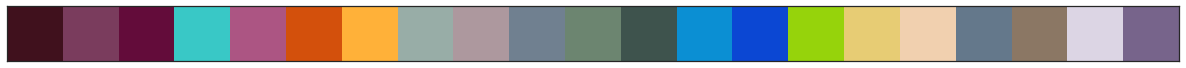

In [5]:

import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.manifold import TSNE
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#40111D', '#7A3C5D', '#630C3A'
                 ,'#39C8C6', '#AC5583', '#D3500C'
                 ,'#FFB139', '#98ADA7', '#AD989E'
                 ,'#708090','#6C8570','#3E534D'
                 ,'#0B8FD3','#0B47D3','#96D30B'                 
                 ,'#E7CC74','#F1D0AF','#64788B'                 
                 ,'#8B7764','#DCD5E4','#77648B',]
sns.set_palette(customPalette)
sns.palplot(customPalette)


from clusim.clustering import Clustering, remap2match
import clusim.sim as sim

from photonai.base import Hyperpipe, PipelineElement, Preprocessing, OutputSettings
from photonai.optimization import FloatRange, Categorical, IntegerRange
from photonai.base.photon_elements import PhotonRegistry
from photonai.visual.graphics import plot_cm
#from photonai.base.registry.registry import PhotonRegistry

In [6]:
#import pixiedust


In [7]:
def results_to_df(results):
    ll = []
    for obj in results:
        ll.append([obj.operation,
        obj.value,
        obj.metric_name])
    _results=pd.DataFrame(ll).pivot(index=2, columns=0, values=1)
    _results.columns=['Mean','STD']
    
    return(_results)

In [8]:
def cluster_plot(my_pipe, data_X, customPalette):
    y_pred= my_pipe.predict(data_X)
    data = pd.DataFrame(data_X[:, 0],columns=['x'])
    data['y'] = data_X[:, 1]
    data['labels'] = y_pred
    facet = sns.lmplot(data=data, x='x', y='y', hue='labels', 
                       aspect= 1.0, height=7,
               fit_reg=False, legend=True, legend_out=True)

    for i, label in enumerate( np.sort(data['labels'].unique())):
        plt.annotate(label, 
                     data.loc[data['labels']==label,['x','y']].mean(),
                     horizontalalignment='center',
                     verticalalignment='center',
                     size=10, weight='bold',
                     color='white',
                     backgroundcolor=customPalette[i]) 

    plt.show()
    return y_pred

In [9]:
__file__ = "exp1.log"
base_folder = os.path.dirname(os.path.abspath(''))
custom_elements_folder = os.path.join(base_folder, 'custom_elements')
custom_elements_folder

'/docker/custom_elements'

In [10]:
registry = PhotonRegistry(custom_elements_folder=custom_elements_folder)
registry.activate()
registry.PHOTON_REGISTRIES,PhotonRegistry.PHOTON_REGISTRIES

(['PhotonCore', 'PhotonCluster', 'PhotonNeuro', 'CustomElements'],
 ['PhotonCore', 'PhotonCluster', 'PhotonNeuro', 'CustomElements'])

In [11]:
registry.activate()
registry.list_available_elements()
# take off last name


PhotonCore
ARDRegression                       sklearn.linear_model.ARDRegression                                          Estimator
AdaBoostClassifier                  sklearn.ensemble.AdaBoostClassifier                                         Estimator
AdaBoostRegressor                   sklearn.ensemble.AdaBoostRegressor                                          Estimator
BaggingClassifier                   sklearn.ensemble.BaggingClassifier                                          Estimator
BaggingRegressor                    sklearn.ensemble.BaggingRegressor                                           Estimator
BayesianGaussianMixture             sklearn.mixture.BayesianGaussianMixture                                     Estimator
BayesianRidge                       sklearn.linear_model.BayesianRidge                                          Estimator
BernoulliNB                         sklearn.naive_bayes.BernoulliNB                                             Estimator
BernoulliRBM

## KMeans blobs

In [12]:
registry.info("KMeans")

----------------------------------
Name: KMeans
Namespace: sklearn.cluster
----------------------------------
Possible Hyperparameters as derived from constructor:
n_clusters                          n_clusters=8                                                               
init                                init='k-means++'                                                           
n_init                              n_init=10                                                                  
max_iter                            max_iter=300                                                               
tol                                 tol=0.0001                                                                 
precompute_distances                precompute_distances='auto'                                                
verbose                             verbose=0                                                                  
random_state                        random_state=Non

('KMeans',
 'sklearn.cluster',
 {'n_clusters': 'n_clusters',
  'init': 'init',
  'n_init': 'n_init',
  'max_iter': 'max_iter',
  'tol': 'tol',
  'precompute_distances': 'precompute_distances',
  'verbose': 'verbose',
  'random_state': 'random_state',
  'copy_x': 'copy_x',
  'n_jobs': 'n_jobs',
  'algorithm': 'algorithm'})

In [13]:
import sklearn.datasets as skd
NC = 21
def yield_parameters(n_p_clusters):
    n_cluster = NC
    cluster_std = 0.25

    for n_p_cluster in n_p_clusters:
        n_cluster_std = [cluster_std*k**0.5+0.2 for k in range(n_cluster)]
        print("n_cluster_std:", n_cluster_std)
        n_samples = [n_p_cluster for k in range(n_cluster)]
        data_X, data_y = make_blobs(n_samples=n_samples,
                                   cluster_std=n_cluster_std, random_state=0)
        yield [data_X, data_y]

In [14]:
#import pixiedust
#%%pixie_debugger

In [15]:
def hyper_cluster(cluster_name):
    
    n_p_clusters = [3,30, 100, 300, 3000]

    for data_X, data_y  in yield_parameters(n_p_clusters):
        print('n_points:', len(data_y))
        """
        Example script for KMedoids hopt
        """
        X = data_X.copy(); y =  data_y.copy()
        # DESIGN YOUR PIPELINE
        settings = OutputSettings(project_folder='./tmp/')

        my_pipe = Hyperpipe('batching',
                            optimizer='sk_opt',
        #                    optimizer_params={'n_configurations': 25},
                            metrics=['ARI', 'MI', 'HCV', 'FM'],
                            best_config_metric='ARI',
                            outer_cv=KFold(n_splits=5),
                            inner_cv=KFold(n_splits=10),
                            verbosity=0,
                            output_settings=settings)


        my_pipe += PipelineElement(cluster_name
                                   , hyperparameters={
                                       'n_clusters': IntegerRange(2, NC),
                                   },random_state=777)

        # NOW TRAIN YOUR PIPELINE
        my_pipe.fit(X, y)

        debug = True

    #------------------------------plot
        y_pred=cluster_plot(my_pipe, X, customPalette)
    #--------------------------------- best
        print(pd.DataFrame(my_pipe.best_config.items()
                           ,columns=['n_clusters', 'k']))
    #------------------------------
        print('train','\n'
              ,results_to_df(my_pipe.results.metrics_train))
        print('test','\n'
              ,results_to_df(my_pipe.results.metrics_test))
    #------------------------------   
        # turn the ground-truth labels into a clusim Clustering
        true_clustering = Clustering().from_membership_list(y) 
        kmeans_clustering = Clustering().from_membership_list(y_pred) # lets see how similar the predicted k-means clustering is to the true clustering
    #------------------------------
        # using all available similar measures!
        row_format2 ="{:>25}" * (2)
        for simfunc in sim.available_similarity_measures:
            print(row_format2.format(simfunc, eval('sim.' + simfunc+'(true_clustering, kmeans_clustering)')))
    #------------------------------# The element-centric similarity is particularly useful for understanding
    # how a clustering method performed

    # Let's start with the single similarity value:
        elsim = sim.element_sim(true_clustering, kmeans_clustering)
        print("Element-centric similarity: {}".format(elsim))

n_cluster_std: [0.2, 0.45, 0.5535533905932738, 0.6330127018922194, 0.7, 0.7590169943749474, 0.8123724356957944, 0.8614378277661476, 0.9071067811865476, 0.95, 0.990569415042095, 1.02915619758885, 1.0660254037844386, 1.1013878188659973, 1.1354143466934854, 1.1682458365518542, 1.2, 1.230776406404415, 1.2606601717798211, 1.2897247358851684, 1.3180339887498949]
n_points: 63
***************************************************************************************************************
PHOTON ANALYSIS: batching
***************************************************************************************************************

***************************************************************************
Outer Cross validation Fold 1
*****************************************************************************
---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
--------------------------------------------------------------------

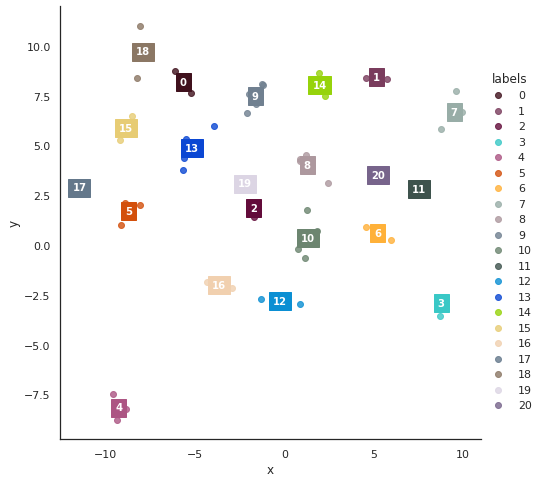

           n_clusters   k
0  KMeans__n_clusters  21
train 
          Mean       STD
2                      
ARI  0.589579  0.036282
FM   0.613810  0.034077
HCV  0.875381  0.025426
MI   0.678415  0.032032
test 
          Mean       STD
2                      
ARI  0.505336  0.327398
FM   0.561338  0.325748
HCV  0.905788  0.066520
MI   0.550485  0.321685
            jaccard_index      0.43434343434343436
               rand_index       0.9713261648745519
            adjrand_index       0.5909519321394905
    fowlkes_mallows_index        0.609515332973006
                 fmeasure       0.6056338028169014
             purity_index       0.7777777777777777
     classification_error      0.22222222222222232
        czekanowski_index       0.6056338028169014
               dice_index       0.6056338028169014
           sorensen_index       0.6056338028169014
    rogers_tanimoto_index       0.9442508710801394
          southwood_index       0.7678571428571429
      pearson_correlation    4.48

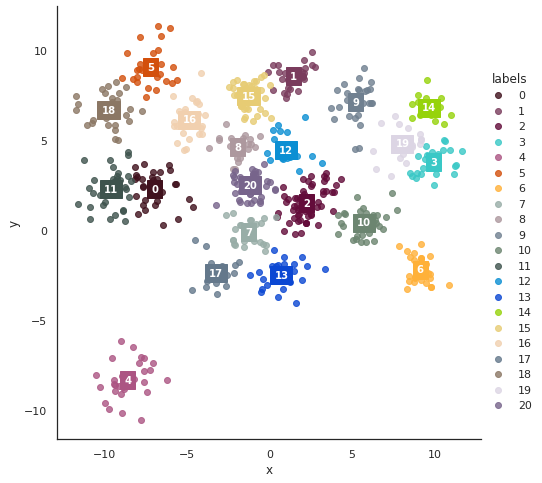

           n_clusters   k
0  KMeans__n_clusters  21
train 
          Mean       STD
2                      
ARI  0.689669  0.010270
FM   0.705868  0.009636
HCV  0.834993  0.004327
MI   0.816530  0.006843
test 
          Mean       STD
2                      
ARI  0.677076  0.037089
FM   0.695227  0.034282
HCV  0.862225  0.017271
MI   0.780531  0.023452
            jaccard_index       0.5323130600269605
               rand_index       0.9702324172912408
            adjrand_index       0.6791858132864926
    fowlkes_mallows_index       0.6958194915860999
                 fmeasure       0.6947836886772925
             purity_index        0.792063492063492
     classification_error      0.20793650793650797
        czekanowski_index       0.6947836886772925
               dice_index       0.6947836886772925
           sorensen_index       0.6947836886772925
    rogers_tanimoto_index       0.9421858228815927
          southwood_index       1.1381824347236351
      pearson_correlation   3.741

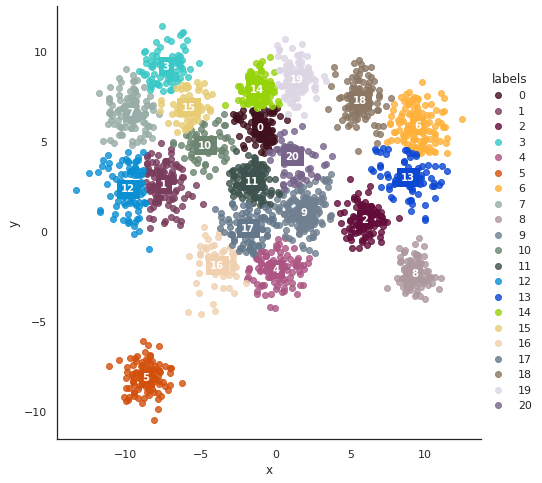

           n_clusters   k
0  KMeans__n_clusters  21
train 
          Mean       STD
2                      
ARI  0.708128  0.010641
FM   0.723089  0.010066
HCV  0.830784  0.004497
MI   0.829877  0.004687
test 
          Mean       STD
2                      
ARI  0.702085  0.030938
FM   0.717708  0.029536
HCV  0.842171  0.009989
MI   0.817206  0.012756
            jaccard_index       0.5544113454960091
               rand_index       0.9716304816352458
            adjrand_index       0.6984505250423341
    fowlkes_mallows_index       0.7141228800221736
                 fmeasure       0.7133392934919652
             purity_index       0.8138095238095238
     classification_error      0.18619047619047624
        czekanowski_index       0.7133392934919652
               dice_index       0.7133392934919652
           sorensen_index       0.7133392934919652
    rogers_tanimoto_index       0.9448262169227545
          southwood_index       1.2442223110755697
      pearson_correlation    3.06

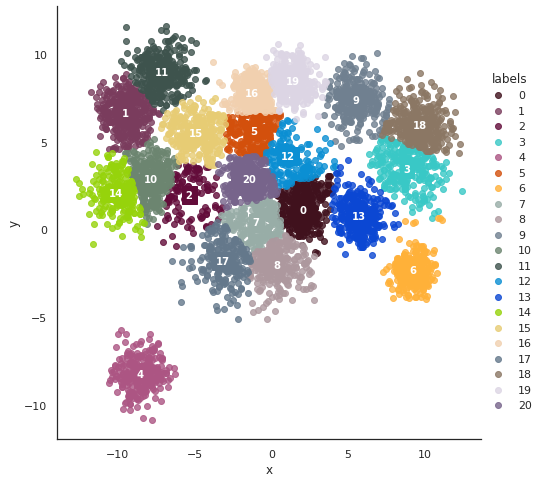

           n_clusters   k
0  KMeans__n_clusters  21
train 
          Mean       STD
2                      
ARI  0.704322  0.007692
FM   0.719518  0.007089
HCV  0.820814  0.004256
MI   0.824555  0.002542
test 
          Mean       STD
2                      
ARI  0.698650  0.020619
FM   0.714412  0.019767
HCV  0.824903  0.008405
MI   0.821321  0.010160
            jaccard_index       0.5666711927221029
               rand_index       0.9726571867038608
            adjrand_index       0.7090494415336255
    fowlkes_mallows_index       0.7239774775698955
                 fmeasure        0.723407943357288
             purity_index       0.8203174603174603
     classification_error      0.17968253968253967
        czekanowski_index        0.723407943357288
               dice_index        0.723407943357288
           sorensen_index        0.723407943357288
    rogers_tanimoto_index       0.9467698358478565
          southwood_index       1.3077164111978647
      pearson_correlation   3.839

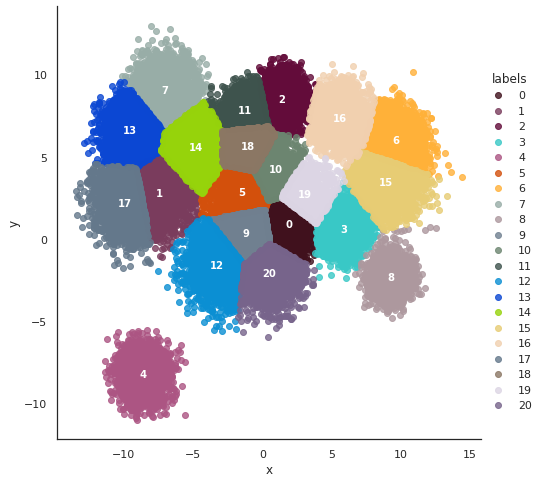

           n_clusters   k
0  KMeans__n_clusters  21
train 
          Mean       STD
2                      
ARI  0.709605  0.006328
FM   0.724417  0.005852
HCV  0.821668  0.002015
MI   0.826426  0.001546
test 
          Mean       STD
2                      
ARI  0.708755  0.010827
FM   0.723605  0.010241
HCV  0.822179  0.005806
MI   0.826243  0.005678
            jaccard_index       0.5831828245887781
               rand_index        0.974205692355409
            adjrand_index       0.7231718961111823
    fowlkes_mallows_index        0.737015755943024
                 fmeasure       0.7367220203898514
             purity_index       0.8394761904761905
     classification_error       0.1605238095238095
        czekanowski_index       0.7367220203898514
               dice_index       0.7367220203898514
           sorensen_index       0.7367220203898514
    rogers_tanimoto_index        0.949708616138026
          southwood_index       1.3991333826717287
      pearson_correlation    3.94

In [ ]:
hyper_cluster('KMeans')